# 4. Object-oriented programmation with Obspy

In this chapter, we will study what Python was planned to be : an oriented-object language!
_"Jérémy, you lost me..."_. No worries! We will go slowly. Theses lessons about Classes, methods and everything are brand new to you if you didn't study other oriented-object languages.

In this chapter, we will see:

- Open and write into a file: not really into _object-oriented_ stuff but I wanted to see that with you.
- Apprehend classes and define properties : The really beginning of you being a master of Python ... After this you will conquer the world for sure
- Specific methods: A class is not just methods and attributes, you can do a bit more (a lot more actually)
- Inheritance: For small projects, a little bit useless but when you will write the whole Windows OS in Python in the last chapter ... (not true, don't panick!). It's a important notion in object-oriented programmation that you can find anywhere.

## 4.2. Classes

### 4.2.1 Classes

Aaaaand here we are. The Object-Oriented programmation. I see your smile on your face when new notions appear in the lessons. A whole world to discover for some people. It is not just concepts, it's a true philosophy.  And in Python, without even knowing about it, everything is object. A function, a variable. Behind all of this, the concept of object is here. 

You already saw that to add an element in a list, you just have to write `my_list.append(element)`. And it just seemed a little easier than `append_to_list(my_list, element)`. But it's not just aesthetic for the __OOP__, that's a way of life.

A __class__ is the __model__ to create the __object__. Inside of it, there will be our __methods__, __attributes__. Attributes are just variables created inside of the object. Do you follow me?

There are a lot of already existing classes like numbers, strings, lists ... but when you create a big script, you'll have to create your own class to make it all a little a bit easy for you, the programmer, but also for the user of your script. If he doesn't understand the logic when he wants to modify something, he will try to call to you every two minutes.

#### Convention PEP8

To write classes, there are some conventions of writing style that you can find [here](<https://www.python.org/dev/peps/pep-0020/>).

We don't use the _underscore_ anymore like for functions. We will use the __Camel Case__. Each time you write a word, you'll use a capital letter. For example, to declare a class with the keyword ... __`class`__, you'll write : `class NameOfMyClass:`.

And what is coming ... you see me coming with this ... `obspy`! We will begin slow using the functions of obspy to create our own classes. 

#### `class Station` : Attributes

Here. We. Are. You can work in a PyCharm project or just here for the moment. Depends on what do you want to do after my lesson.

We will first create a class with some attributes directly taken from seismic data and after we will go further.

The main attributes can be find in MiniSeed file in the `stats` of the Trace.

In [3]:
from obspy import read

st = read('code/3_1/RD.SONA0..SHZ.D.2020.001')
tr = st[0]
print(tr.stats)

         network: RD
         station: SONA0
        location: 
         channel: SHZ
       starttime: 2020-01-01T00:00:00.000000Z
         endtime: 2020-01-01T23:59:59.980000Z
   sampling_rate: 50.0
           delta: 0.02
            npts: 4320000
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 1219, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 4993024})


So we will create our class based on the information of ``SONA0`` the LP and CP stations of Songino. As attributes, we take the network, the name of the station, the channel and the sampling_rate.

To create an object of the class, we will need a special method called the __instantiation__. So we don't say anymore _create an object of the class_ but _create a new instance_. The instantiation will create the attributes.

In [2]:
class Station: # define our class Station
    """
    Class describing a sensor with attributes:
    - network
    - station
    - channel
    - sampling_rate
    """
    
    def __init__(self): # Our instantiation method
        """
        Define the attribute station
        """
        self.station = tr.stats.station # from the Trace we read before

As you can see, the function `__init__(self)` seems classic. The name is _init_ and will be the same for every class you write. In the next chapter, we will the see all the __special methods__, there are always surrounded by two underscores from each side (`__namemethod__`).

In the instantiation, you see the attribute `station`. We create the variable `self.station` inside of the class and we affect the value `SONA0`.

In [3]:
my_station = Station()
print(my_station)

print(my_station.station)

SONA0


The `self.***` is simply the object we create. It's not a new variable, object or anything. So when you write `self.station`, you declare a value inside of a class statement. It will be the same for every attribute and method!

If we put some more things inside of our _instantiator_ (= instantiation method), we will have something like this :

In [4]:
class Station: # define our class Station
    """
    Class describing a sensor with attributes:
    - network
    - station
    - channel
    - sampling_rate
    """
    
    def __init__(self): # Our instantiation method
        """
        Instantiator of Station class.
        """
        self.network = tr.stats.network # from the Trace we read before
        self.station = tr.stats.station 
        self.channel = tr.stats.channel
        self.sampling_rate = tr.stats.sampling_rate

Now, you can create an object with more attributes.

In [5]:
my_station = Station()
print(my_station.network)
print(my_station.channel)

RD
SHZ


If you want to change an attribute, you just have to affect with a new value.

In [6]:
my_station.sampling_rate = 20.0
print(my_station.sampling_rate)

20.0


What is the point of doing this, all my stations don't have the same name, etc. Yes, we can have a smart instantiator to declare the attributes when we create the object. We will add parameters to our ``__init__`` method without forgetting the `self`!

In [8]:
class Station: # define our class Station
    """
    Class describing a sensor with attributes:
    - network
    - station
    - channel
    - sampling_rate
    """
    
    def __init__(self, network, station, channel, sampling_rate): # Our instantiation method
        """
        Instantiator of Station class.
        """
        self.network = network # from the Trace we read before
        self.station = station 
        self.channel = channel
        self.sampling_rate = sampling_rate

So when you create a new instance now ...

In [7]:
SONA0_SHZ = Station(tr.stats.network, tr.stats.station,
                   tr.stats.channel, tr.stats.sampling_rate)

print(SONA0_SHZ.sampling_rate)

100.0


I highly recommend you to to try to add some others attributes, change the instantiator and everything to really understand what's going on with the classes.

We can also create what's called a __class attribute__. A class attribute is a common attribute to all the instances of your classes. It can be useful to count how many stations you have for example. Generally we define it before the instantiator.

In [1]:
class Station: # define our class Station
    """
    Class describing a sensor with attributes:
    - network
    - station
    - channel
    - sampling_rate
    """
    
    number_of_stations = 0
    
    def __init__(self, network, station, channel, sampling_rate): # Our instantiation method
        """
        Instantiator of Station class.
        """
        Station.number_of_stations += 1
        
        self.network = network # from the Trace we read before
        self.station = station 
        self.channel = channel
        self.sampling_rate = sampling_rate

In [2]:
SONA0_SHZ = Station(tr.stats.network, tr.stats.station,
                   'SHZ', tr.stats.sampling_rate)
SONA0_SHE = Station(tr.stats.network, tr.stats.station,
                   'SHE', tr.stats.sampling_rate)
SONA0_SHN = Station(tr.stats.network, tr.stats.station,
                   'SHN', tr.stats.sampling_rate)

print(SONA0_SHN.number_of_stations)

NameError: name 'tr' is not defined

#### `class Station` : methods

The attributes are the variables attached to the class and the methods are the actions. It is just functions who manipulate the objets of the class like `append` for the class `list`. 

We take again our Station class and we will add the dedicated function to plot the trace of it inside of obspy. I know, it's not really useful, but it's to learn to you obspy and the creation of classes at the same time.

We will rewrite our class `Station` to build new instance with just the trace of one trace. And then we will add the feature to plot 

In [22]:
class Station: # define our class Station
    """
    Class describing a sensor with attributes:
    - Trace related to obspy file
    - network
    - station
    - channel
    - sampling_rate
    """
    
    number_of_stations = 0
    
    def __init__(self, trace): # Our instantiation method
        """
        Instantiator of Station class.
        """
        Station.number_of_stations += 1
        
        self.trace =  trace
        self.network = trace.stats.network # just an artefact to access easily
        self.station = trace.stats.station 
        self.channel = trace.stats.channel
        self.sampling_rate = trace.stats.sampling_rate
    
    def plot(self):
        """
        Plot the trace inside of our class.
        """
        self.trace.plot()

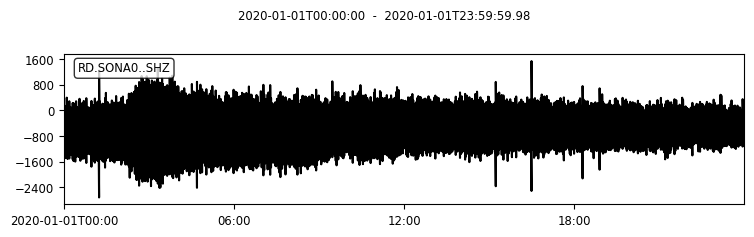

In [23]:
SONA0_SHZ = Station(tr) # tr was the trace #0 of SONA0 SHZ
SONA0_SHZ.plot()

Et voilà! You wrote your first method. Now you can imagine all what you want with it. For sure, it doesn't seem really useful to create another thing similar to what obspy can offer. But if you work on a big research project and want to do use your functions with a formatted number of parameters of an obspy stream object, create your own class will help you to speed up your efficiency.

#### `self`

Just a little thing with the `self`. I said to you that it call the object. When you call attributes, it will search for it in the object you created but when you call functions, it will search for it in your written class. So with our example, calling `SONA0_SHZ.plot()` is exactly the same as `Station.plot(SONA0_SHZ)`. Aaand here is the self.

#### To go further

There are a lot of others things to know about classes like `classmethod`, `staticmethod`, the function `dir`, the dictionary `__dict__` but I don't want you to have mix feelings about it. Especially because you won't use it. You can learn by yourself if you're interested.

### 4.2.2. Properties

The classes are the first point of the object-oriented programmation. But in Python like in others languages, there are some concepts which created the philosophy of the `object`. 

#### Encapsulation

Encapsulation is the principle to hide or protect some data of your object. It's not compulsory to use this at the level we are but I want to present to you just the basics of it if one day, you need it.

How to change or get the attributes so? With __Accessor__ (getter) or __Mutator__ (setter). So when you want to have access to your attribute, instead of writing `my_station.network`, you'll write `my_station.get_network()`. You use a method. And the same way to affect a new value : `my_station.set_network(new_value)`. 

The drawback is it's really long to write like this. So if you don't need it, don't use it. 

And here comes the `property`. You can manage an attribute with three functions. `_get_***`, `_set_***` and `_del_***`. I will write an example with our `Station` and you will understand.

In [4]:
class Station: # define our class Station
    """
    Class describing a sensor with attributes:
    - station
    """
    
    def __init__(self, station): # Our instantiation method
        """
        Instantiator of Station class.
        """
        self._station = station
        
    def _get_station(self):
        """
        Method to read the variable station
        """
        print('I return you the value of the station')
        return self._station
    
    def _set_station(self, new_station):
        """
        Method to set a new value for the station
        """
        print('You modify the station from {} to {}'.format(self._station, new_station))
        self._station = new_station
    
    station = property(_get_station,_set_station)

In [5]:
SONA0 = Station('SONA0')
print(SONA0.station)

I return you the value of the station
SONA0


In [3]:
SONA0.station = 'SONA1'
print(SONA0.station)

You modify the station from SONA0 to SONA1
I return you the value of the station
SONA1


You see some difference like the underscore of `_station`. That will be variable protected from the outside. So, now when you want to access the value, it will call the function you pass into the first parameter of `property`. And to set the value, it will call the second one.

If it's not clear, just analyze the code and try to understand.

It doesn't mean that you cannot write and read directly through `SONA0._name` but it's the convention for Python to consider the attribute as protected. And when you are outside of a class, you know that if this attribute of your object is written like this, you don't have to use it directly, especially modify it directly. Else terrible thing could happen inside of complex classes which needed this attribute.